<a href="https://colab.research.google.com/github/fergogu27-ctrl/EDPII/blob/main/Ecuaci%C3%B3n%20de%20onda.%20M%C3%A9todo%20expl%C3%ADcito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ecuación de onda. Método explícito**

Aproxime la solución del problema hiperbólico
$$\frac{\partial^2 u}{\partial t^2}(x,t) =  -4\frac{\partial^2 u}{\partial x^2}(x,t)=0 ,  \ \ \ \ 0<x<1, \ \ \ \ 0<t $$

con condiciones de frontera
$$u(0,t)=u(1,t)=0, \ \ \ \ para \ \ 0< t$$

y condiciones iniciales
$$u(x,0)=sen(\pi x), \ \ \ 0≤x\le 1, \ \ y  \ \ \ \frac{\partial u}{\partial t}(x,0) =0, 0≤x\le 1$$

Usando h=0.1 y k=0.05.
Compare los resultados con la solución exacta
$$u(x,t)=sen \ \pi \ x  \ cos \ 2 \ \pi \ t$$

Como hicimos en los anteriores ejercicio vamos a seguir los pasos para resolver la ecuación de onda.

In [1]:
import sympy as sp    #METODO PARA FACTORIZAR MATRICES, CALCULO SIMBOLICO
import numpy as np    #HACE ARREGLOS, GRAFICAS

import matplotlib.pyplot as plt   #
from mpl_toolkits.mplot3d import Axes3D   # necesario para 3D
from matplotlib import cm                 # colormap
from tabulate import tabulate #para que sirve la libreria, para hacer ma tabla mas estetica

Definimos nuestra funcion del método dada en la condición.


In [2]:
def f(x):
  return np.sin(np.pi * x)    #Función del método DE LA CONDION INICIAL

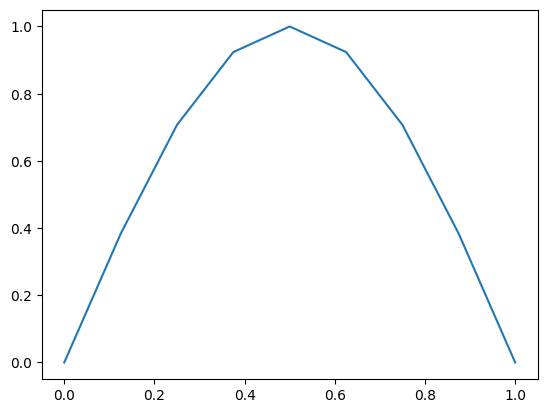

In [3]:
x = np.linspace(0, 1, 9)   #Grafica de la función
plt.plot(x,f(x))

Vamos a calcular la matriz y los vectores que necesitamos.

In [4]:
def tridiagonal(n, a, b):
    return sp.Matrix([    #SIMPY
          [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
          for i in range(n)])

In [5]:
r=1   #L

In [6]:
A = tridiagonal(9, 2-2*r, r)
A

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

Tenemos el vector u0

In [7]:
u0 = sp.Matrix([f(0.1*(i+1)) for i in range(9)])
u0

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [8]:
u1=u0    #La derivada fue cero tenemos que cambiar

In [9]:
def onda(A, u0 ,u1 ,j):#Asegurar que u0 y u1 son vectores columna
  u0 = sp.Matrix(u0)
  u1 = sp.Matrix(u1)

  S=[u0, u1] #Guarda soluciones como vectores

  for n in range (2,j):
      sol = A * S[n-1] - S[n-2]  #u^{n+1}
      S.append(sol)
#Regresae como una matriz donde cada fila es una solucion
  return sp.Matrix([s.T for s in S])


In [10]:
j=11

In [11]:
U=onda(A,u0,u1,j)#Ya es la salida de la funcion ,
U

Matrix([
[  0.309016994374947,   0.587785252292473,  0.809016994374947,  0.951056516295154,                1.0,  0.951056516295154,  0.809016994374947,   0.587785252292473,   0.309016994374948],
[  0.309016994374947,   0.587785252292473,  0.809016994374947,  0.951056516295154,                1.0,  0.951056516295154,  0.809016994374947,   0.587785252292473,   0.309016994374948],
[  0.278768257917526,   0.530248736457422,  0.729824774212679,  0.857960478079794,  0.902113032590307,  0.857960478079794,  0.729824774212679,   0.530248736457422,   0.278768257917526],
[  0.221231742082474,   0.420807779837732,  0.579192220162268,  0.680881290507833,  0.715920956159588,  0.680881290507833,  0.579192220162268,   0.420807779837732,   0.221231742082474],
[  0.142039521920206,   0.270175225787321,  0.371864296132885,  0.437152698242062,  0.459649548425358,  0.437152698242062,  0.371864296132885,   0.270175225787321,   0.142039521920206],
[ 0.0489434837048465,  0.0930960382153596,  0.128135703867115

In [12]:
U_np = np.array(U.tolist(), dtype=float)


In [13]:
#xx=U_np[-1]
#xx

In [14]:
x = np.linspace(0, 1,9)    #Numero de nodos internos en x
y = np.linspace(0, 0.5, j)  #debe coincidir con el tamaño de j por h(tiempo)
X, Y = np.meshgrid(x,y)

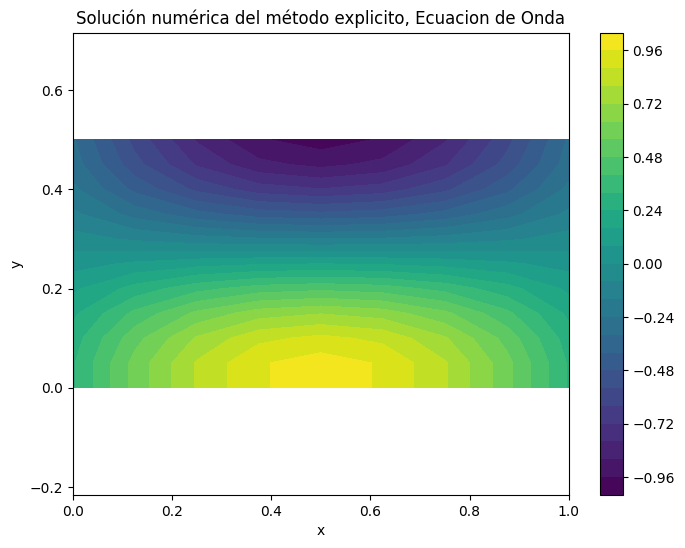

In [15]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title("Solución numérica del método explicito, Ecuacion de Onda")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

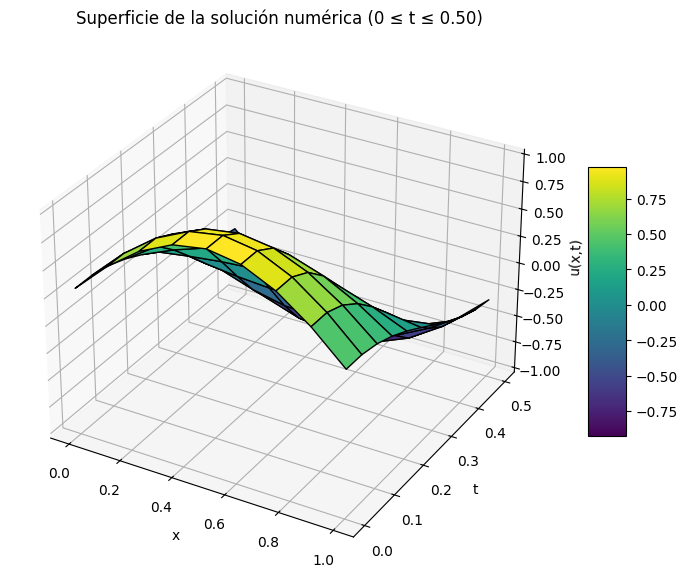

In [16]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')

ax.set_title("Superficie de la solución numérica (0 ≤ t ≤ 0.50)")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u(x,t)")

fig.colorbar(surf, shrink=0.5, aspect=7)
plt.show()

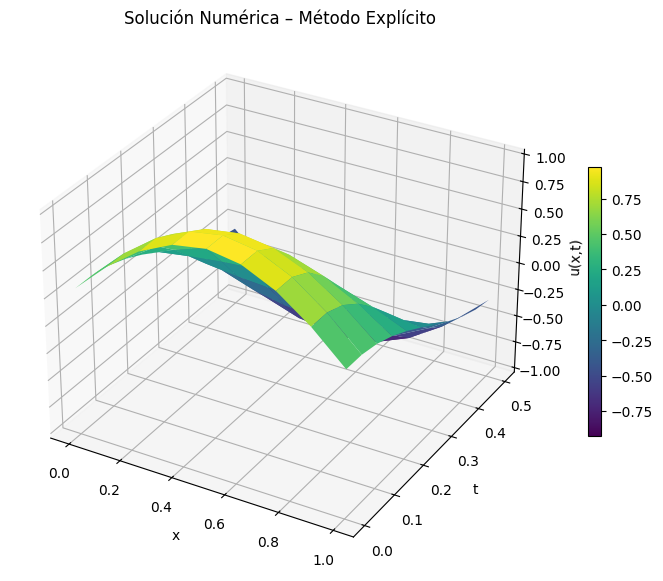

In [17]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis)
ax.set_title("Solución Numérica – Método Explícito")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u(x,t)")
fig.colorbar(surf, shrink=0.5)
plt.show()

**Ejercicio 1**: Generar las gráficas 2D y 3D de la solución hasta t=0.50

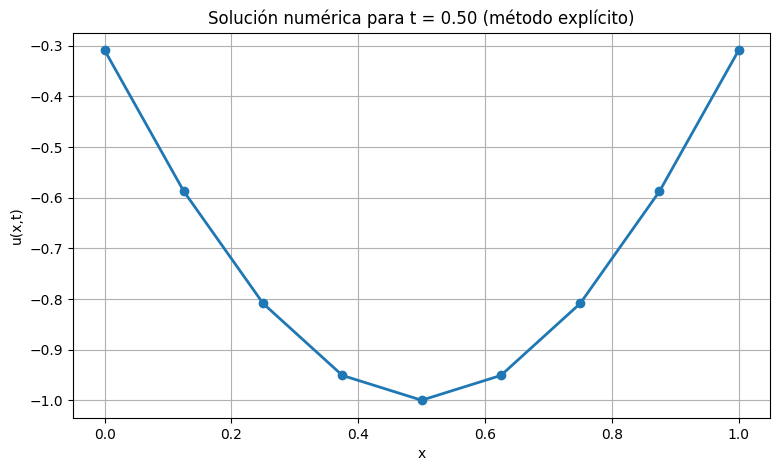

In [18]:
index_t = 10

plt.figure(figsize=(9,5))
plt.plot(x, U_np[index_t], marker='o', linewidth=2)
plt.title("Solución numérica para t = 0.50 (método explícito)")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.grid()
plt.show()



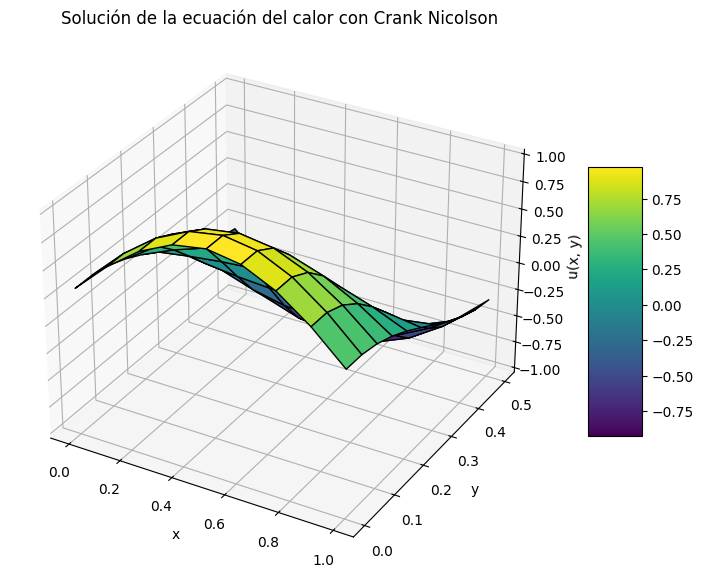

In [19]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Crank Nicolson')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

**Ejercicio 2:** Comparar los valores correspondientes su solución numérica con los resultados numéricos que proporciona la Tabla 12.6, que viene en la imagen adjunta. Graficar y calcular el error.

In [20]:
x_int = np.linspace(0.1, 0.9, 9)

In [21]:
u_num_t05 = U_np[-1, :]

In [22]:
tabla_positiva = np.array([
    0.3090169944, 0.5877852523, 0.8090169944, 0.9510565163,
    1.0000000000, 0.9510565163, 0.8090169944, 0.5877852523, 0.3090169944
])

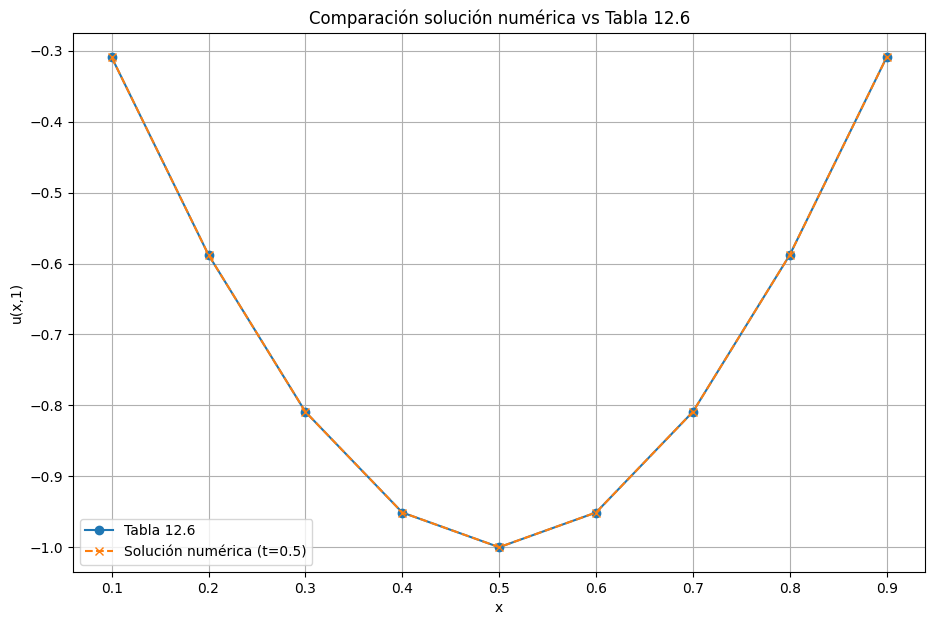

In [23]:
plt.figure(figsize=(11, 7))
plt.plot(x_int, -tabla_positiva, 'o-', label='Tabla 12.6')
plt.plot(x_int, u_num_t05, 'x--', label='Solución numérica (t=0.5)')
plt.xlabel("x")
plt.ylabel("u(x,1)")
plt.title("Comparación solución numérica vs Tabla 12.6")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
tabla_esperada_t05 = tabla_positiva

In [25]:
error = u_num_t05 - tabla_esperada_t05
error_abs = np.abs(error)

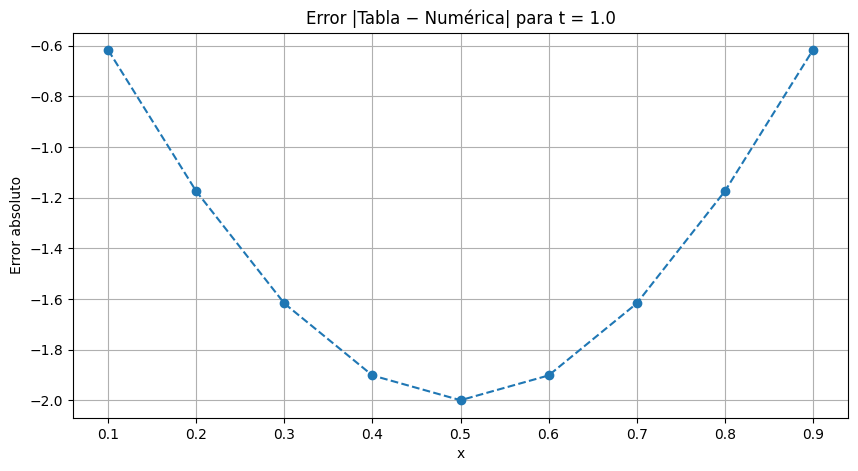

In [26]:
plt.figure(figsize=(10,5))
plt.plot(x_int, error, marker='o', linestyle='--')
plt.xlabel("x")
plt.ylabel("Error absoluto")
plt.title("Error |Tabla − Numérica| para t = 1.0")
plt.grid()
plt.show()

**Ejercicio 3:** Comparar esos mismos valores contra la solución exacta de la ecuación. Graficar y calcular el error. Discutir la comparación.

In [27]:
def u_exacta(x, t):
    return np.sin(np.pi * x) * np.cos(2*np.pi * t)

In [28]:
x_tabla = np.linspace(0.0, 1.0, 9)  # 0,0.1,...,1

In [29]:
u_exact_vec = u_exacta(x_tabla, tabla_positiva)

error_exacta = u_num_t05 - u_exact_vec
error_abs_exacta = np.abs(error_exacta)

In [30]:
print("\n=== Comparación numérica vs solución exacta (t=1.0) ===")
tabla2 = np.column_stack((x_tabla, u_exact_vec, u_num_t05,
                          error_exacta, error_abs_exacta))
print(tabulate(
    tabla2,
    headers=["x_i", "u_exacta", "w_i,num", "error", "|error|"],
    floatfmt=".10f"
))
print("\nError máximo |w_num - u_exacta| =", np.max(error_abs_exacta))



=== Comparación numérica vs solución exacta (t=1.0) ===
         x_i       u_exacta        w_i,num          error       |error|
------------  -------------  -------------  -------------  ------------
0.0000000000  -0.0000000000  -0.3090169944  -0.3090169944  0.3090169944
0.1250000000  -0.3259323690  -0.5877852523  -0.2618528833  0.2618528833
0.2500000000   0.2562377422  -0.8090169944  -1.0652547366  1.0652547366
0.3750000000   0.8805374704  -0.9510565163  -1.8315939867  1.8315939867
0.5000000000   1.0000000000  -1.0000000000  -2.0000000000  2.0000000000
0.6250000000   0.8805374704  -0.9510565163  -1.8315939867  1.8315939867
0.7500000000   0.2562377422  -0.8090169944  -1.0652547366  1.0652547366
0.8750000000  -0.3259323690  -0.5877852523  -0.2618528833  0.2618528833
1.0000000000  -0.0000000000  -0.3090169944  -0.3090169944  0.3090169944

Error máximo |w_num - u_exacta| = 2.0


In [33]:
X, T = np.meshgrid(x, y)   # crea mallas 2D

u_exacta = np.sin(np.pi * X) * np.cos(2 * np.pi * T)

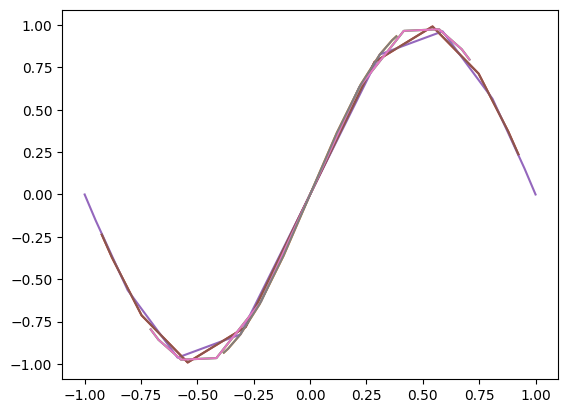

In [34]:
x = np.linspace(0, 1, 9)   #Grafica de la función
plt.plot(u_exacta,f(u_exacta))

In [35]:
t_index = 10  # índice del tiempo que quieres graficar (último)
t = y[t_index]

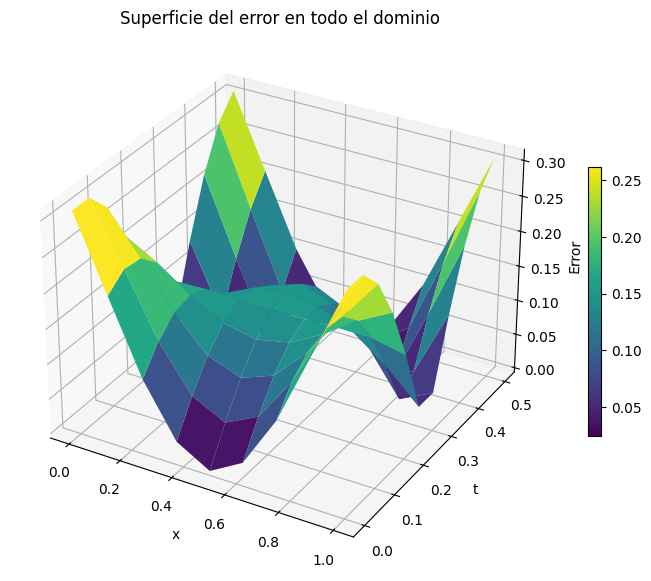

In [36]:
Error_total = np.abs(u_exacta - U_np)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Error_total, cmap=cm.viridis)
ax.set_title("Superficie del error en todo el dominio")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("Error")
fig.colorbar(surf, shrink=0.5)
plt.show()

In [37]:
tabla = np.column_stack((x, U_np[t_index], u_exacta[t_index], error))
print(tabulate(tabla, headers=["x", "U num", "U exacta", "Error"], floatfmt=".8f"))

         x        U num     U exacta        Error
----------  -----------  -----------  -----------
0.00000000  -0.30901699  -0.00000000  -0.61803399
0.12500000  -0.58778525  -0.38268343  -1.17557050
0.25000000  -0.80901699  -0.70710678  -1.61803399
0.37500000  -0.95105652  -0.92387953  -1.90211303
0.50000000  -1.00000000  -1.00000000  -2.00000000
0.62500000  -0.95105652  -0.92387953  -1.90211303
0.75000000  -0.80901699  -0.70710678  -1.61803399
0.87500000  -0.58778525  -0.38268343  -1.17557050
1.00000000  -0.30901699  -0.00000000  -0.61803399


**Ejercicio 4:** Genere una animación de la evolución temporal de la solución, donde efectivamente se observen las ondulaciones de la onda.

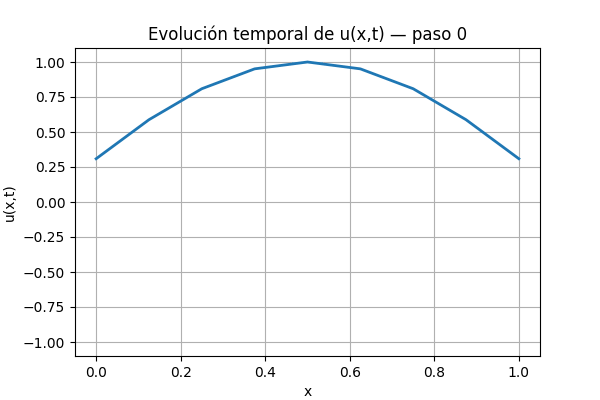

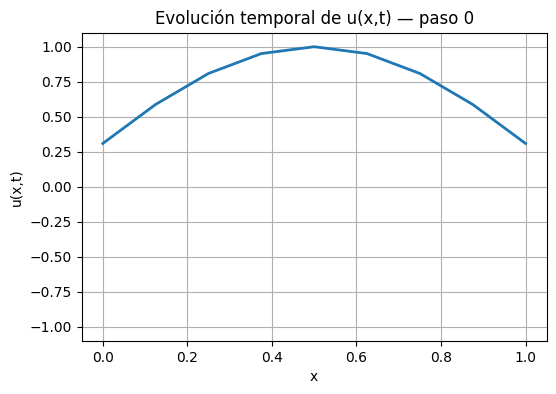

In [38]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

# ===============================================================
#   ANIMACIÓN DEL COMPORTAMIENTO DE LA SOLUCIÓN (GIF)
# generamos un GIF que muestra la evolución temporal de u(x,t)

# ===============================================================


# U_np tiene forma (j, 9) con los nodos internos

U_anim = U_np.copy()

# Crear figura
fig, ax = plt.subplots(figsize=(6,4))
line, = ax.plot(x, U_anim[0], linewidth=2)

ax.set_title("Evolución de la solución u(x,t)")
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_ylim(np.min(U_anim)*1.1, np.max(U_anim)*1.1)
ax.grid(True)

# Función que actualiza cada frame del GIF
def update(frame):
    line.set_ydata(U_anim[frame])
    ax.set_title(f"Evolución temporal de u(x,t) — paso {frame}")
    return line,

# Crear animación
anim = animation.FuncAnimation(fig, update, frames=j, interval=150)

# ===============================================================
# Guardar GIF en el directorio actual
# ===============================================================
gif_path = "solucion_animada.gif"
anim.save(gif_path, writer=PillowWriter(fps=8))

# Mostrar GIF
from IPython.display import Image
Image(filename=gif_path)

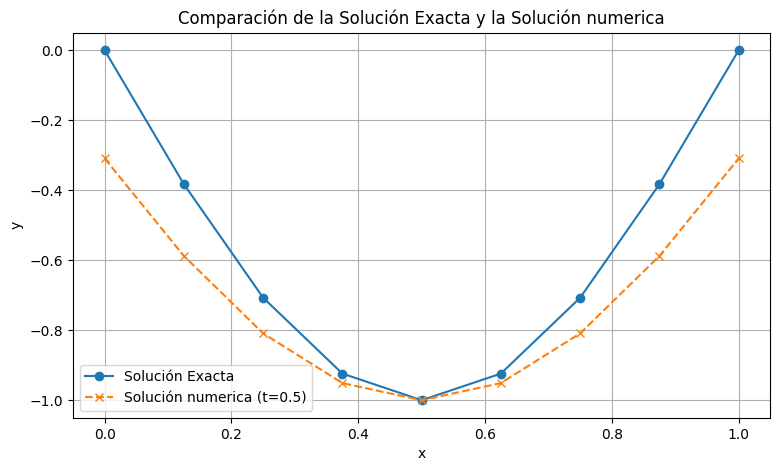

In [39]:
plt.figure(figsize=(9, 5))
plt.plot(x, u_exacta[t_index, :] , marker='o', linestyle='-', label='Solución Exacta')
plt.plot(x, U_np[t_index, :] , marker='x', linestyle='--', label=f'Solución numerica (t={t})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de la Solución Exacta y la Solución numerica')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
error = np.abs(u_exacta[t_index] - U_np[t_index])

tabla = np.column_stack((x, U_np[t_index], u_exacta[t_index], error))
print(tabulate(tabla, headers=["x", "U num", "U exacta", "Error"], floatfmt=".8f"))

         x        U num     U exacta       Error
----------  -----------  -----------  ----------
0.00000000  -0.30901699  -0.00000000  0.30901699
0.12500000  -0.58778525  -0.38268343  0.20510182
0.25000000  -0.80901699  -0.70710678  0.10191021
0.37500000  -0.95105652  -0.92387953  0.02717698
0.50000000  -1.00000000  -1.00000000  0.00000000
0.62500000  -0.95105652  -0.92387953  0.02717698
0.75000000  -0.80901699  -0.70710678  0.10191021
0.87500000  -0.58778525  -0.38268343  0.20510182
1.00000000  -0.30901699  -0.00000000  0.30901699


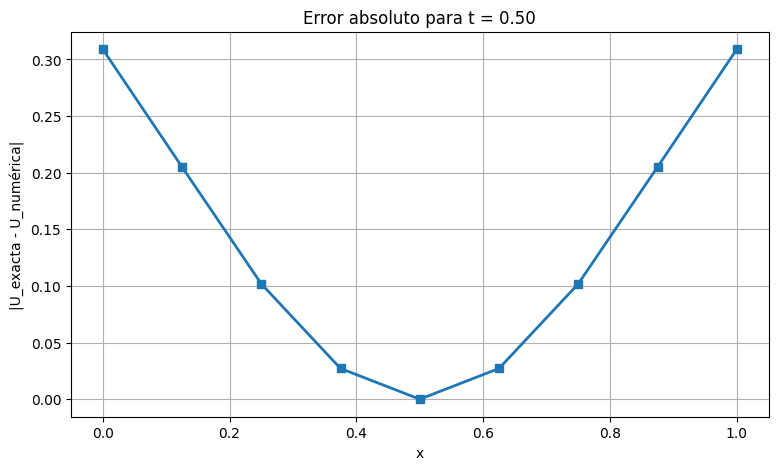

In [41]:
t_deseado = 0.5
index_t = np.argmin(np.abs(y - t_deseado))

# Error para t = 0.5
error = np.abs(u_exacta[index_t, :] - U_np[index_t, :])

plt.figure(figsize=(9,5))
plt.plot(x, error, marker='s', linestyle='-', linewidth=2)
plt.title(f"Error absoluto para t = {y[index_t]:.2f}")
plt.xlabel("x")
plt.ylabel("|U_exacta - U_numérica|")
plt.grid()
plt.show()

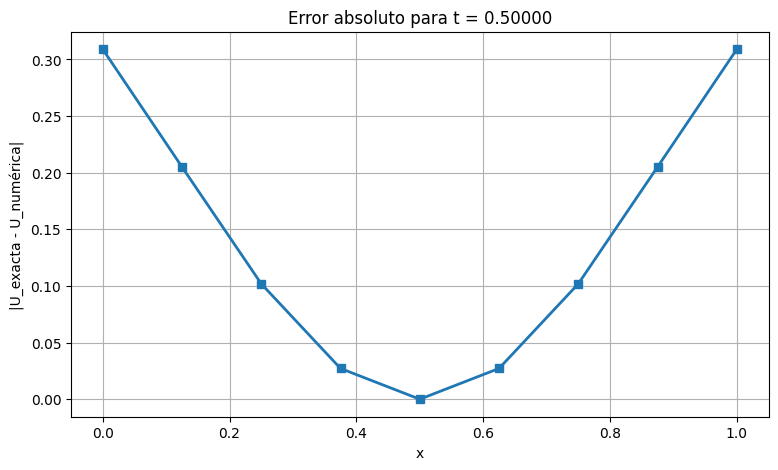

In [42]:
plt.figure(figsize=(9,5))
plt.plot(x, error, marker='s', linestyle='-', linewidth=2)
plt.title(f"Error absoluto para t = {y[index_t]:.5f}")
plt.xlabel("x")
plt.ylabel("|U_exacta - U_numérica|")
plt.grid()
plt.show()


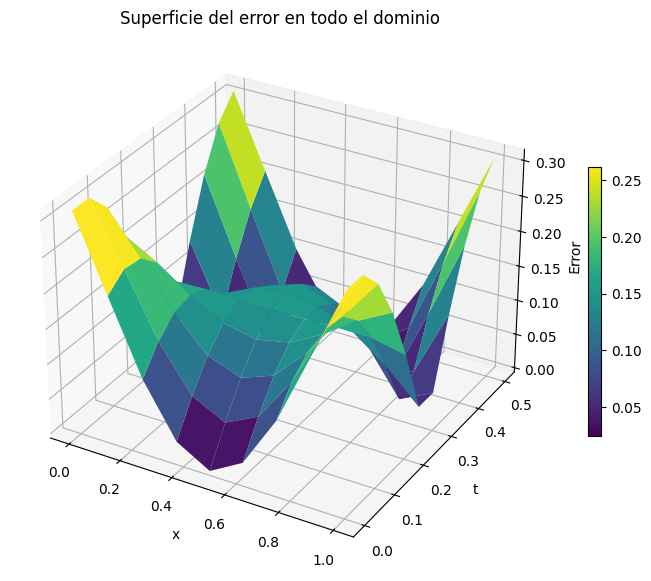

In [43]:
Error_total = np.abs(u_exacta - U_np)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Error_total, cmap=cm.viridis)
ax.set_title("Superficie del error en todo el dominio")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("Error")
fig.colorbar(surf, shrink=0.5)
plt.show()